In [14]:
## Importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## data collection and analysis

In [15]:
## loading the data from CSV to Pandas Dataframe
df = pd.read_csv('insurance.csv')

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
## number of rows and columns
df.shape

(1338, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## catagarical feature
- sex
- smoker
- region


In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


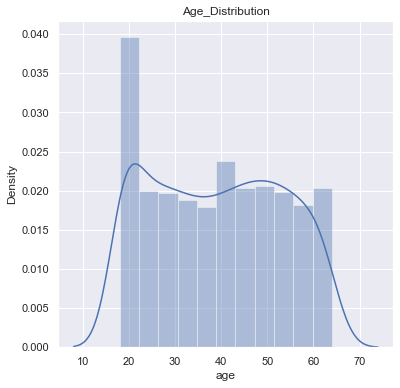

In [23]:
## distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age_Distribution')
plt.show()

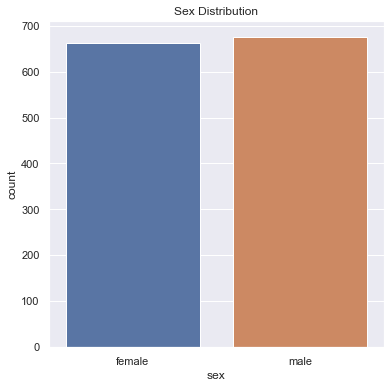

In [24]:
##  gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [27]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


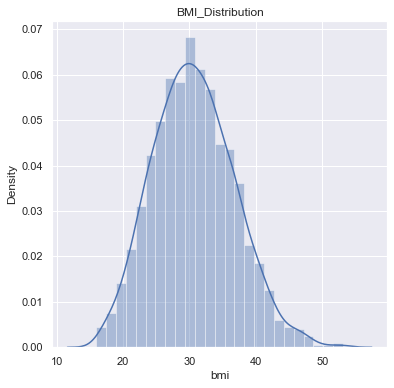

In [28]:
# BMI Dsitribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI_Distribution')
plt.show()

# normal BMI range -> 18.5 - 24.9

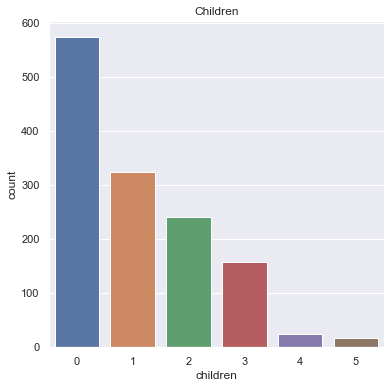

In [30]:
##  children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [31]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

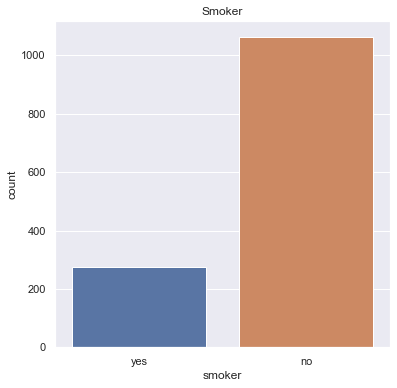

In [32]:
##  smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

In [33]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

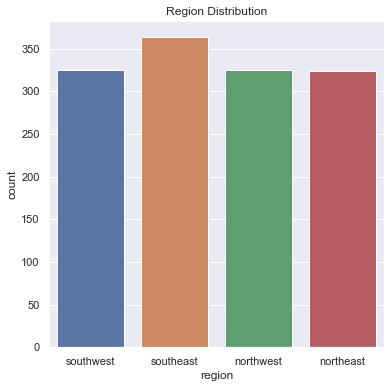

In [36]:
## region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()

In [35]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


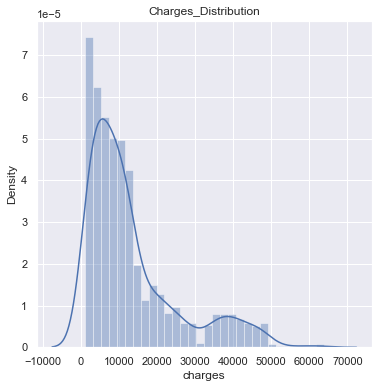

In [39]:
## Charges column
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges_Distribution')
plt.show()

## Data Preprocessing

## Encoding the catagarical features

In [44]:
## encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
## encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
## encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [46]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## splitting the feature and target

In [48]:
x = df.drop(columns='charges', axis = 1)
y = df['charges']

In [49]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [53]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## splitting data into trining data and testing data

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)


In [52]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## model training

## linear regression 

In [54]:
## loading the linear regression model 
regressor = LinearRegression()

In [55]:
regressor.fit(x_train, y_train)

LinearRegression()

## model evaluation

In [56]:
## prediction on training data
training_data_prediction = regressor.predict(x_train)

In [57]:
## R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [58]:
## prediction on test data
testing_data_prediction = regressor.predict(x_test)

In [59]:
## R squared value
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684076


## Build a predictive system

In [62]:
input_data = (31,1,25.74,0,1,0)

## changing input data to array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The isurance cost is USD', prediction[0])

[3760.0805765]
The isurance cost is USD 3760.080576496048
